# Matplotlib
* plot을 쉽게 그릴 수 있도록 도와주는 패키지
* https://wikidocs.net/92071
* https://matplotlib.org/stable/plot_types/index.html
* https://codetorial.net/matplotlib/index.html
---
### 오늘 배울 것
1. matplotlib 구조
2. plot
3. figure, subplot
4. rcParams
5. 이미지로 저장

---
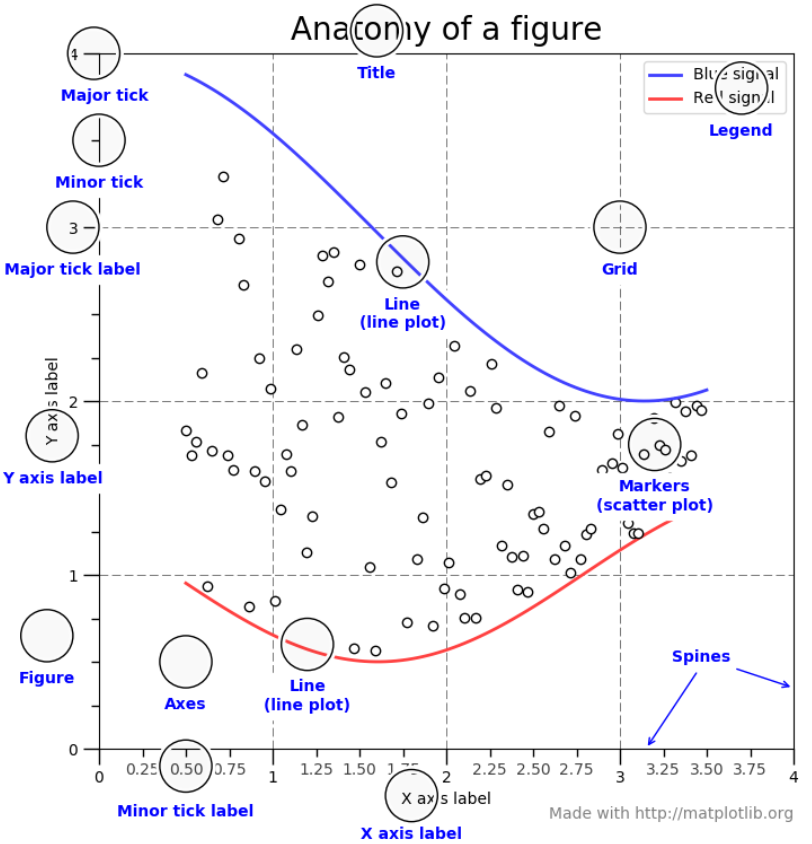

In [3]:
import matplotlib.pyplot as plt

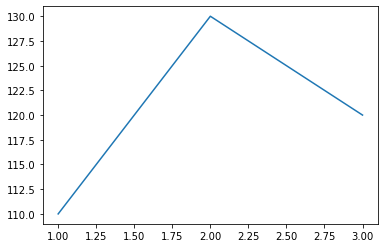

In [8]:
# sample plot

plt.plot([1,2,3], [110,130,120])
plt.show()

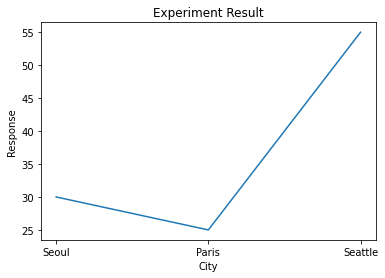

In [10]:
# label and title

plt.plot(["Seoul","Paris","Seattle"], [30,25,55])
plt.xlabel('City')
plt.ylabel('Response')
plt.title('Experiment Result')
plt.show()

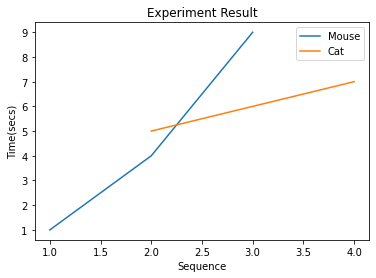

In [11]:
# legend

plt.plot([1,2,3], [1,4,9])
plt.plot([2,3,4],[5,6,7])
plt.xlabel('Sequence')
plt.ylabel('Time(secs)')
plt.title('Experiment Result')
plt.legend(['Mouse', 'Cat'])
plt.show()

---

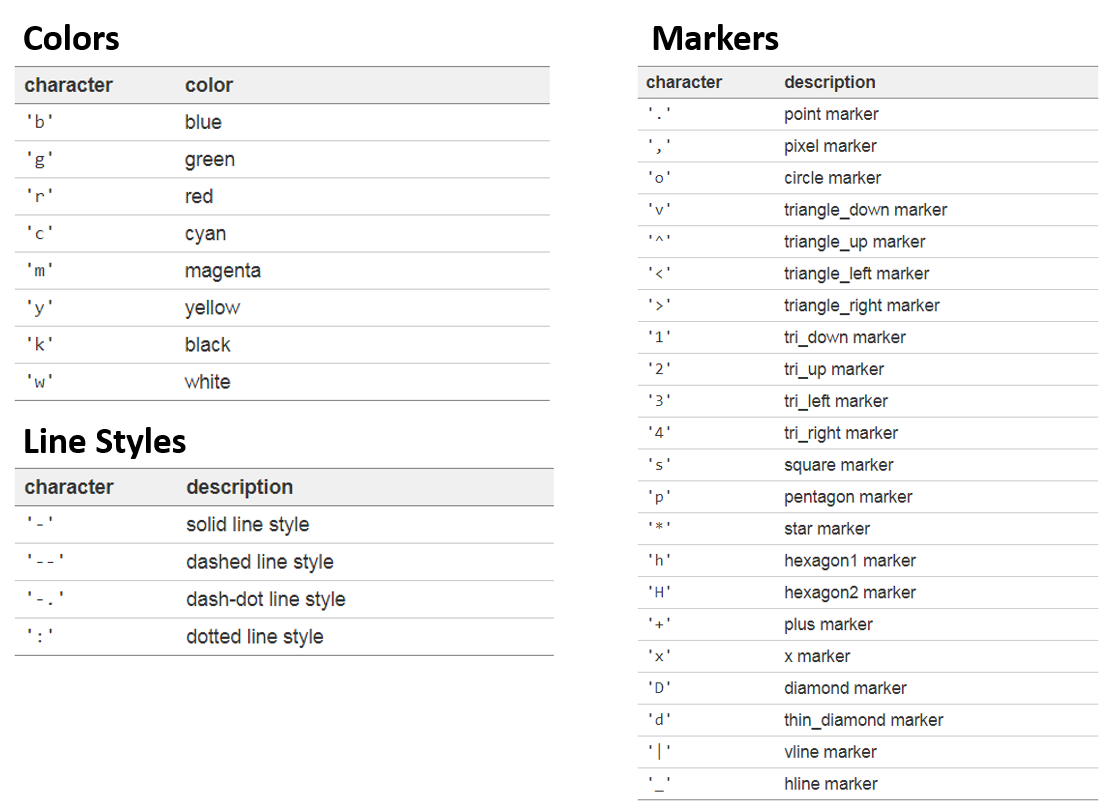

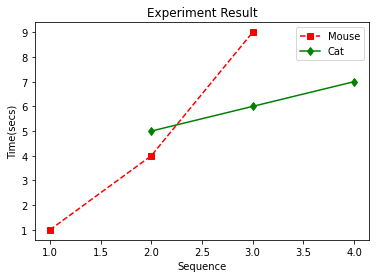

In [17]:
# color, line, marker

plt.plot([1,2,3], [1,4,9], 'r--s')
plt.plot([2,3,4],[5,6,7], 'g-d')
plt.xlabel('Sequence')
plt.ylabel('Time(secs)')
plt.title('Experiment Result')
plt.legend(['Mouse', 'Cat'])
plt.show()

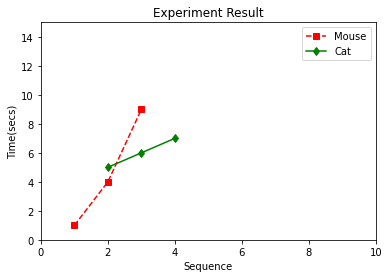

In [19]:
# limit

plt.plot([1,2,3], [1,4,9], 'r--s')
plt.plot([2,3,4],[5,6,7], 'g-d')
plt.xlabel('Sequence')
plt.ylabel('Time(secs)')
plt.title('Experiment Result')
plt.legend(['Mouse', 'Cat'])
plt.xlim([0, 10])
plt.ylim([0, 15])
plt.show()

---

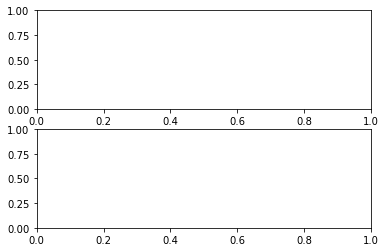

In [31]:
# subplot

fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1) # 2행 1열로 나누고 첫번째 칸
ax2 = fig.add_subplot(2, 1, 2) # 2행 1열로 나누고 두번째 칸


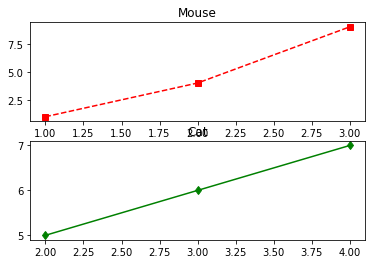

In [34]:
# subplot

fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1) # 2행 1열로 나누고 첫번째 칸
ax2 = fig.add_subplot(2, 1, 2) # 2행 1열로 나누고 두번째 칸

x1 = [1,2,3]
y1 = [1,4,9]
ax1.plot(x1, y1, 'r--s')
ax1.set_title('Mouse')

x2 = [2,3,4]
y2 = [5,6,7]
ax2.plot(x2, y2, 'g-d')
ax2.set_title('Cat')

plt.show()

In [35]:
# TODO : Stylize each plots (label)
# TODO : Spacing between two plots
# TODO : Set title of whole figure



---
rcParams 사용법 : https://wikidocs.net/141547

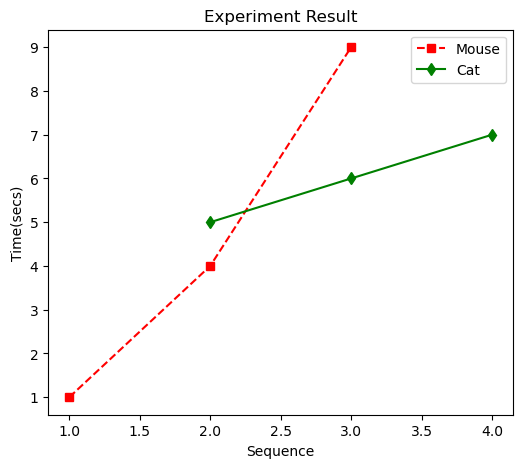

In [45]:
# rcParams

plt.style.use('default')
plt.rcParams['figure.figsize'] = (6, 5)
plt.rcParams['font.size'] = 10

plt.plot([1,2,3], [1,4,9], 'r--s')
plt.plot([2,3,4],[5,6,7], 'g-d')
plt.xlabel('Sequence')
plt.ylabel('Time(secs)')
plt.title('Experiment Result')
plt.legend(['Mouse', 'Cat'])
plt.show()

In [46]:
# TODO : Save as image file



---

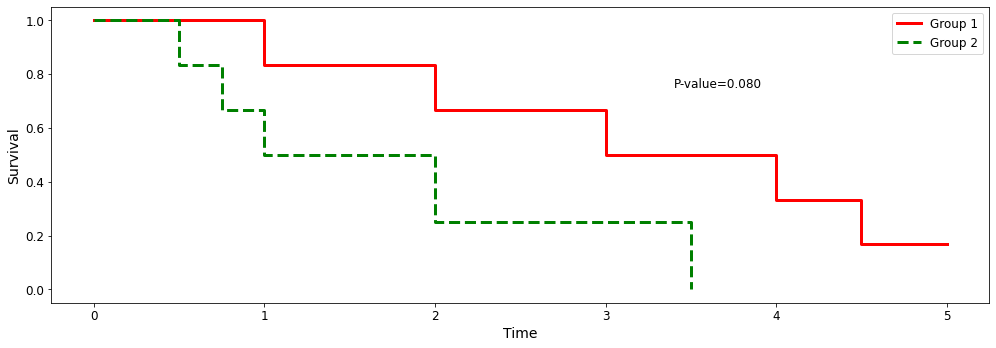

In [37]:
# TODO : Stylize following code

from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
from matplotlib import rcParams
import matplotlib.pyplot as plt
import numpy as np

if __name__=='__main__':
    #### 1. Kaplan-Meier curve로 나타낼 데이터 입력
    labels = ['Group 1', 'Group 2']
    groups = [1, 1, 1, 1,   1, 1,   2,    2, 2,   2, 2,   2]
    events = [1, 1, 1, 1,   1, 0,   1,    1, 1,   0, 1,   1]
    times  = [1, 2, 3, 4, 4.5, 5, 0.5, 0.75, 1, 1.5, 2, 3.5]

    #### 2. 데이터 전처리
    E = np.array(events, dtype=np.int32)
    T = np.array(times, dtype=np.float32)
    
    #### 3. matplotlib 설정
    rcParams.update({'font.size': 12})
    fig, ax = plt.subplots(figsize=(14,5))
    styles = ['-', '--']
    colors = ['r', 'g']
    lw = 3
    
    #### 4. Kaplan-Meier 그리기
    kmf = KaplanMeierFitter()
    for i, label in enumerate(labels):
        ix = np.array(groups) == (i+1)
        kmf.fit(T[ix], event_observed=E[ix], label=labels[i])
        kmf.plot(ax=ax, ci_show=False, linewidth=lw, style=styles[i], c=colors[i])
    
    #### 5. Logrank 검정
    ix = np.array(groups) == 2
    result = logrank_test(T[ix], T[~ix], E[ix], E[~ix], alpha=.99)
    pvalue = result.p_value
    ax.text(3.4,0.75,'P-value=%.3f'% pvalue) # 위치(3.4,0.75) 수동으로 지정필요
    
    #### 6. 그래프 세부설정
    ax.set_xlabel('Time', fontsize=14)
    ax.set_ylabel('Survival', fontsize=14)
    ax.legend(loc='upper right')

    #### 7. 그래프 저장하고 출력하기
    plt.tight_layout()
    plt.savefig('ex_kmplot.png', format='png', dpi=300)
    plt.show()